<a href="https://colab.research.google.com/github/pjmandhare/sit725project/blob/main/1_3C_Classification_using_FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to your assignment this week! 


# Classification task

In this task you are asked to build a simple Feed Forward Neural Network, train it and test it!


**After this assignment you will be able to:**

- Load a dataset.
- Train a Feed Forward Neural Network.
- Test a Feed Forward Neural Network.

Let's get started! Run the following cell to install all the packages you will need.

In [1]:
#!pip install numpy
#!pip install keras
#!pip install tensorflow
#!pip install pandas
#!pip install matplotlib

if you are using GoogleColab, please install the following packages and mount your Google drive:

In [2]:
# !apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended  2> /dev/null  > /dev/null 
# !apt-get install pandoc 2> /dev/null  > /dev/null 

# from google.colab import drive
# drive.mount('/content/drive')


Run the following cell to load the packages you will need.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The dataset we will use consists of 4500 examples with 512 features. A label is given for each example to indicate positive and negative instances.

Let's read the data.

In [8]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df.set_index('id', inplace=True)

Now, let's split the data into training and test sets.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df.index.values,
    df.label.values,
    test_size=0.15,
    random_state=17,
    stratify=df.label.values
)
df['data_type'] = ['note_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_test, 'data_type'] = 'test'

## The data to use:

X_train = df[df['data_type']=='train'].iloc[:,:512].values
X_test = df[df['data_type']=='test'].iloc[:,:512].values
y_train = df[df['data_type']=='train'].iloc[:,512:513].values
y_test = df[df['data_type']=='test'].iloc[:,512:513].values

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:

X_train.shape


(3825, 512)

In [12]:
y_train.shape


(3825, 1)

In [22]:
X_test.shape

(675, 512)

In [23]:
y_test.shape

(675, 1)

In [ ]:
X_train = to_categorical(X_train,num_classes=10)

In [21]:
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

# Task 1

Build a Feed Forward Neural Network to address this classification task using the Keras framework.

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Level1 (Flatten)             (None, 512)               0         
_________________________________________________________________
Level2 (Dense)               (None, 312)               160056    
_________________________________________________________________
Level3 (Dense)               (None, 128)               40064     
_________________________________________________________________
Output (Dense)               (None, 1)                 129       
Total params: 200,249
Trainable params: 200,249
Non-trainable params: 0
_________________________________________________________________


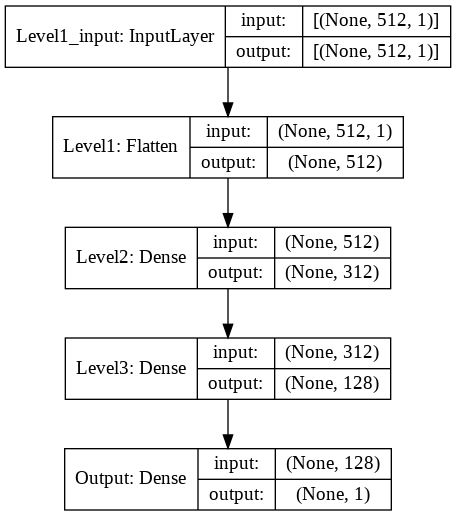

In [42]:
# START YOUR CODE HERE

# define the keras model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import tensorflow as tf


#modelv = models.Sequential()
#model.add(layers.Conv2D(250,(1), activation='relu', input_shape=(3825,512,1)))
#model.add(layers.MaxPooling2D((2)))
#model.add(layers.Conv2D(120, (1), activation='relu'))
#model.add(layers.MaxPooling2D((1)))
#model.add(layers.Conv2D(58, (1), activation='relu'))
# model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(10, activation='softmax'))
model= tf.keras.Sequential(
    [
    tf.keras.layers.Flatten(input_shape=(512, 1),name="Level1"),
    tf.keras.layers.Dense(312, activation='relu',name="Level2"),
    tf.keras.layers.Dense(128, activation='relu',name="Level3"),
    tf.keras.layers.Dense(1,activation='softmax',name="Output")
    ]
)
 
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

# Training

Now, let's start our training.

In [53]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
history = model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1)

Epoch 1/200
60/60 [==============================] - 1s 5ms/step - loss: 349509536.0000 - accuracy: 0.6348
Epoch 2/200
60/60 [==============================] - 0s 4ms/step - loss: 338540384.0000 - accuracy: 0.6348
Epoch 3/200
60/60 [==============================] - 0s 4ms/step - loss: 327963392.0000 - accuracy: 0.6348
Epoch 4/200
60/60 [==============================] - 0s 4ms/step - loss: 317720896.0000 - accuracy: 0.6348
Epoch 5/200
60/60 [==============================] - 0s 5ms/step - loss: 307816288.0000 - accuracy: 0.6348
Epoch 6/200
60/60 [==============================] - 0s 5ms/step - loss: 298220800.0000 - accuracy: 0.6348
Epoch 7/200
60/60 [==============================] - 0s 5ms/step - loss: 288869760.0000 - accuracy: 0.6348
Epoch 8/200
60/60 [==============================] - 0s 4ms/step - loss: 279865664.0000 - accuracy: 0.6348
Epoch 9/200
60/60 [==============================] - 0s 5ms/step - loss: 271062688.0000 - accuracy: 0.6348
Epoch 10/200
60/60 [=================

In [55]:


# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=1)
_, test_acc = model.evaluate(X_test, y_test, verbose=1)

22/22 [==============================] - 0s 2ms/step - loss: 1342038.7500 - accuracy: 0.6341


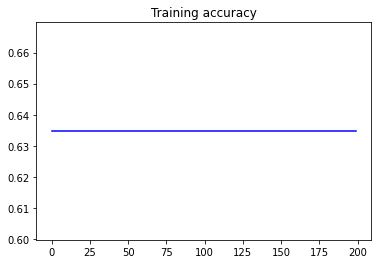

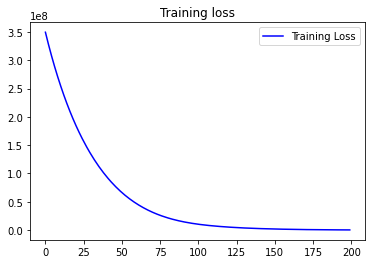

In [56]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

# Task 2

Test the model on the test set and report Precision, Recall, F1-Score, and Accuracy.

In [58]:
# START YOUR CODE HERE

# predict probabilities for test set
pred_probs = model.predict(X_test, verbose=1)
# predict crisp classes for test set
pred_classes = model.predict_classes(X_test, verbose=1)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_classes)
print('F1 score: %f' % f1)

22/22 [==============================] - 0s 2ms/step
Accuracy: 0.634074
Precision: 0.634074
Recall: 1.000000
F1 score: 0.776065


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Export your notebook to a pdf document

In [4]:
!jupyter nbconvert --to pdf '/content/1_3C_Classification_using_FFNN (1).ipynb'

[NbConvertApp] Converting notebook /content/1_3C_Classification_using_FFNN (1).ipynb to pdf
[NbConvertApp] Support files will be in 1_3C_Classification_using_FFNN (1)_files/
[NbConvertApp] Making directory ./1_3C_Classification_using_FFNN (1)_files
[NbConvertApp] Making directory ./1_3C_Classification_using_FFNN (1)_files
[NbConvertApp] Making directory ./1_3C_Classification_using_FFNN (1)_files
[NbConvertApp] Writing 70541 bytes to ./notebook.tex
[NbConvertApp] Building PDF
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/nbconvert/nbconvertapp.py", line 338, in start
    

# Congratulations!

You've come to the end of this assignment, and you have built your first neural network. 

Congratulations on finishing this notebook! 

